# Principal Component Analysis

In [327]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Step 1 - Dataset creation

In [328]:
# Sample set no. 1
mu_vec1 = np.array([0,0,0]) # sample mean
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]]) # sample covariance
sample_set1 = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

In [329]:
print("Sample set no.1 - matrix " + str(sample1.shape) + ":\n" + str(sample1) + "\n")

Sample set no.1 - matrix (3, 20):
[[ 1.35014937 -0.11756173  0.59859382 -0.22457986  0.44140583  0.43875736
  -0.88113159  0.99985619  0.03298921  0.11555248 -0.10822575 -0.78458078
   0.9096489  -1.50657089 -0.4074544   0.79623512  1.88724245  0.99432673
  -1.62267565  0.03737467]
 [-1.50772744 -1.8625547  -0.21857037  1.42941712 -1.11012236 -0.32612958
  -1.63369395  1.87170948  0.18118571 -0.23569027  0.22867404  0.19689721
  -0.75108768 -0.56664352 -0.05406135  0.39389481  0.98838961  0.08577302
   1.20373825  0.28776754]
 [ 0.32632701  0.56694798  1.26850936  0.42784081 -0.35779823 -1.21242192
  -2.08322709  0.09051897 -0.2621772  -1.57412116  0.06373436  1.42341656
   1.7183335   0.39433982 -0.34118278  1.19879045  0.61447027  1.42514384
   1.31058526  1.44291671]]



In [330]:
# Checking if mean of set1 is close to 1 according to mu_vec1
np.mean(sample_set1)

-0.10196723337270693

In [331]:
# Sample set no. 2 - 
mu_vec2 = np.array([1,1,1]) # sample mean
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]]) # sample covariance
sample_set2 = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

In [332]:
print("Sample set no.2 - matrix " + str(sample2.shape) + ":\n" + str(sample2))

Sample set no.2 - matrix (3, 20):
[[ 0.45985895  2.52909079  1.0915244  -0.66563761  0.3772402   1.68220859
   1.01482661  0.61051094  0.873484    0.31718803  0.98510701  1.61781078
   2.02811341  0.33214114  1.78095644  1.31547689  0.17259103  2.45847107
  -0.59890692  2.57413636]
 [ 0.79044185  2.8123036   1.84969435  0.76199442  0.93976232  0.99813056
   1.12599164  1.95467349  0.29671384 -0.51645678  1.31135598  2.57068796
   0.76442085  0.82750658  2.17778227  0.53622751  0.38636173  1.43702202
   0.31325692 -0.08227477]
 [ 1.33538842  0.4272051   2.03326691 -0.24187425  0.03981139  0.49521281
   1.25378499  1.16487791  0.86772456  2.17975311  0.1052358   1.266296
   0.00282923 -1.43188174 -0.03534471  0.68202904  0.29165765  1.01035733
   0.81343679  1.34309855]]


In [333]:
# Checking if mean of set2 is close to 0 according to mu_vec2
np.mean(sample_set2)

0.88004231080947759

### Step 2 - Plot Data

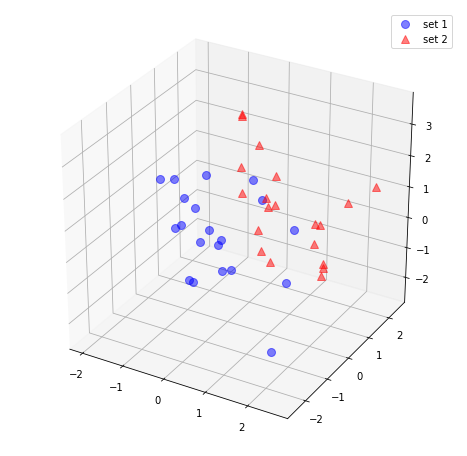

In [334]:
# Create Figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

# Draw points of both data sets
ax.plot(sample_set1[0,:], sample_set1[1,:], sample_set1[2,:], 'o', markersize=8, color='blue', alpha=0.5, label="set 1")
ax.plot(sample_set2[0,:], sample_set2[1,:], sample_set2[2,:], '^', markersize=8, color='red', alpha=0.5, label="set 2")

# Show legend
ax.legend(loc='upper right')
plt.show()

### Step 3 - merge the data into one dataset

In [335]:
# Merging two sample sets into one
all_samples = np.concatenate((sample_set1, sample_set2), axis=1)

In [336]:
print("All_samples - matrix " + str(all_samples.shape) + ":\n" + str(all_samples))

All_samples - matrix (3, 40):
[[  2.34194404e-01  -1.98364523e+00  -2.04956007e-01   1.20758960e+00
    1.48126407e+00   1.59157906e+00  -1.46400369e-01  -1.19573455e+00
   -1.78595064e+00  -1.59107526e+00   3.30167790e-01  -4.65662415e-01
    1.29280756e-01  -1.04940442e+00  -1.47738706e+00   1.04853849e+00
   -1.47878040e-01   5.32820169e-01  -1.09053933e+00  -1.92746535e-01
   -3.88669533e-01   5.84294768e-01   1.80550629e+00   6.90205385e-01
    1.48018899e-02   1.96446000e+00   5.30315383e-01  -5.52021160e-01
    2.53283199e+00   1.04871649e+00   9.77528325e-01   8.45678414e-01
    2.12281465e+00  -2.07477463e-01   8.30596918e-01   2.46675371e-01
    1.75221121e+00   2.59347864e+00   2.08355038e+00   1.13901967e+00]
 [ -8.17397091e-01   5.76211819e-01  -8.24073068e-01   3.98194735e-01
   -7.79156581e-01   7.30364218e-03   1.43620434e+00   4.32509393e-01
    1.11321967e+00   5.04318893e-01  -4.62381689e-01  -5.77860128e-01
   -4.64343237e-01  -4.04971086e-01   1.71092672e+00  -4.24

### Step 4 - mean normalization of each point/feature

Given data:

\begin{equation*}
 x_1, x_2, x_3, ..., x_m
\end{equation*}

Calculate data mean:

\begin{equation*}
\mu_k = \frac{1}{m}\sum_{i=1}^mx^{(i)}_k
\end{equation*}

Where:
- i - data index
- j - data row (depending on dimension)
- m - num of all data samples

Apply to each sample in data set:

\begin{equation*}
x^{(i)}_k = x_k - \mu_k
\end{equation*}  

In [337]:
# Calculating mean of each data dimension
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

# Creating mean vector
mean_vec = np.array([[mean_x], [mean_y], [mean_z]])

In [338]:
print(mean_vec.shape)

(3, 1)


In [339]:
# Creating mean vector
mean_vec = np.array([[mean_x], [mean_y], [mean_z]])

In [340]:
print(mean_vec)

[[ 0.3959643 ]
 [ 0.34642806]
 [ 0.42472026]]


In [341]:
# Creating matrix of same size as all samples
all_samples_normalized = np.zeros(all_samples.shape)

# # Subtracting dimension mean from each data dimension row
all_samples_normalized = all_samples - mean_vec

In [342]:
print("All_samples_normalized - matrix " + str(all_samples_normalized.shape) + ":\n" + str(all_samples_normalized))

All_samples_normalized - matrix (3, 40):
[[ -1.61769898e-01  -2.37960954e+00  -6.00920309e-01   8.11625300e-01
    1.08529977e+00   1.19561475e+00  -5.42364671e-01  -1.59169885e+00
   -2.18191494e+00  -1.98703956e+00  -6.57965124e-02  -8.61626718e-01
   -2.66683547e-01  -1.44536872e+00  -1.87335136e+00   6.52574183e-01
   -5.43842342e-01   1.36855867e-01  -1.48650364e+00  -5.88710837e-01
   -7.84633836e-01   1.88330466e-01   1.40954199e+00   2.94241083e-01
   -3.81162412e-01   1.56849570e+00   1.34351081e-01  -9.47985462e-01
    2.13686768e+00   6.52752189e-01   5.81564023e-01   4.49714112e-01
    1.72685034e+00  -6.03441765e-01   4.34632615e-01  -1.49288931e-01
    1.35624691e+00   2.19751433e+00   1.68758607e+00   7.43055371e-01]
 [ -1.16382515e+00   2.29783761e-01  -1.17050113e+00   5.17666773e-02
   -1.12558464e+00  -3.39124416e-01   1.08977629e+00   8.60813349e-02
    7.66791612e-01   1.57890835e-01  -8.08809747e-01  -9.24288186e-01
   -8.10771295e-01  -7.51399144e-01   1.36449866

In [343]:
# Checking if every feature has 0 mean now
norm_mean_x = np.mean(all_samples_normalized[0,:])
norm_mean_y = np.mean(all_samples_normalized[1,:])
norm_mean_z = np.mean(all_samples_normalized[2,:])

In [344]:
print(round(norm_mean_x), round(norm_mean_y), round(norm_mean_z))

0.0 0.0 0.0


### Step 5 - Calculating Covariance Matrix

#### a) solution 1

Covariance Matrix:

\begin{equation*}
\sum = \frac{1}{m}\sum_{i=1}^m(x^{(i)})(x^{(i)})^T
\end{equation*}

Where:
- i - data index
- m - num of all data samples

In [345]:
cov_mat = (1/all_samples_normalized.shape[1]) * (all_samples_normalized.dot(all_samples_normalized.T))

In [346]:
print("Covariance matrix: \n" + str(cov_mat))

Covariance matrix: 
[[ 1.39927539 -0.05118933 -0.05388539]
 [-0.05118933  0.88617421  0.17278791]
 [-0.05388539  0.17278791  1.56084581]]


#### b) solution 2

We can use numpy to calculate Covariance Matrix. Result will be slightly difference. Numpy uses scaling factor **(1/m - 1)** instead of **(1/m)**. Eigenvalues will be slightly different but eigenvectors will be the same thus reusult of both solutions will be the same in the end.

In [347]:
cov_mat = np.cov(all_samples)

In [348]:
print("Covariance matrix: \n" + str(cov_mat))

Covariance matrix: 
[[ 1.43515425 -0.05250187 -0.05526706]
 [-0.05250187  0.90889663  0.17721836]
 [-0.05526706  0.17721836  1.6008675 ]]


### Step 6 - compute eigenvectors and eigenvalues

- What are eigen values and eigen vectors: http://setosa.io/ev/eigenvectors-and-eigenvalues/
- How to calculate eigen values and eigen vectors: http://www.sosmath.com/matrix/eigen1/eigen1.html

In [349]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [350]:
print("Eigenvalues: \n" + str(eig_val))

Eigenvalues: 
[ 1.6629147   1.41841521  0.86358847]


In [351]:
print("Eigenvectors: \n" + str(eig_vec))

Eigenvectors: 
[[ 0.28051362 -0.95749987 -0.06712757]
 [-0.23807778 -0.00165719 -0.97124468]
 [-0.92985541 -0.28842895  0.22842431]]


### Step 7 - Create eigenpairs and sord in descending order

In [352]:
# Create tuples, makes vector vals positive
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

In [353]:
eig_pairs

[(1.6629146956088023, array([ 0.28051362, -0.23807778, -0.92985541])),
 (1.4184152115874638, array([-0.95749987, -0.00165719, -0.28842895])),
 (0.8635884742228398, array([-0.06712757, -0.97124468,  0.22842431]))]

In [354]:
# Sort (eigenvalues, eigenvectors) pairs with descending order
eig_pairs.sort()
eig_pairs.reverse()

In [355]:
eig_pairs

[(1.6629146956088023, array([ 0.28051362, -0.23807778, -0.92985541])),
 (1.4184152115874638, array([-0.95749987, -0.00165719, -0.28842895])),
 (0.8635884742228398, array([-0.06712757, -0.97124468,  0.22842431]))]

### Step 8 - create matrix of eigenvectors

Currently our data is 3D. We have 3x3 matrix of eigenvectors. Depending on number of rows we pick - we can reduce dimensionality of our data.

From 3D to 2D - if we pick 2 rows

In [356]:
matrix_w2d = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1))).T

In [357]:
matrix_w2d

array([[ 0.28051362, -0.23807778, -0.92985541],
       [-0.95749987, -0.00165719, -0.28842895]])

From 3D to 1D - if we pick 1 row

In [358]:
matrix_w1d = np.hstack((eig_pairs[0][1].reshape(3,1))).T

In [359]:
matrix_w1d

array([ 0.28051362, -0.23807778, -0.92985541])

### Step 9 - Reduce data dimension

In [360]:
reduced_2d = matrix_w2d.dot(all_samples)

In [361]:
print(reduced_2d.shape)

(2, 40)


In [362]:
reduced_1d = matrix_w1d.dot(all_samples)

In [363]:
print(reduced_1d.shape)

(40,)


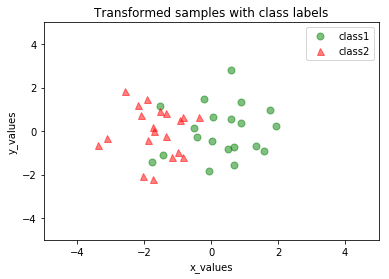

In [364]:
plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()